In [187]:
!pip install "Yfinance"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [188]:
import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [189]:
AAPLdata = yf.download("AAPL", start="2010-10-01", end="2022-10-28")
AAPL_df = pd.DataFrame(AAPLdata)
AAPL_df.to_csv("AAPL_data.csv")

[*********************100%***********************]  1 of 1 completed


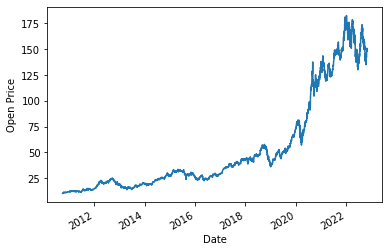

In [190]:
read_df = AAPL_df
read_df['Open'].plot()
plt.ylabel("Open Price")
plt.show()

Correalation check 

In [191]:
df = pd.read_csv("/content/AAPL_data.csv")
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999893,0.999861,0.999711,0.999664,-0.475832
High,0.999893,1.000000,0.999841,0.999862,0.999821,-0.474313
Low,0.999861,0.999841,1.000000,0.999868,0.999819,-0.478168
Close,0.999711,0.999862,0.999868,1.000000,0.999953,-0.476378
Adj Close,0.999664,0.999821,0.999819,0.999953,1.000000,-0.477418
Volume,-0.475832,-0.474313,-0.478168,-0.476378,-0.477418,1.000000


Dropping Volume

In [192]:
df=df.drop("Volume",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Check Null elements

In [193]:
df.isnull().sum().sum()

0

Goal is to predit [ "Open","High","Low","Close","Adj Close"] for next day.

Adding next day data to feature

In [194]:
feature=df.iloc[:-1,].values
label1=df["Open"][1:].values
label2=df["High"][1:].values
label3=df["Low"][1:].values
label4=df["Close"][1:].values
label5=df["Adj Close"][1:].values


Assigning features for each labels.

We have [ "Open","High","Low","Close","Adj Close"] as labels.

 First Open price will be predicted, after High price and so on respectively.

In [195]:
set1=np.column_stack((feature,label1))
set2=np.column_stack((set1,label2))
set3=np.column_stack((set2,label3))
set4=np.column_stack((set3,label4))
set5=np.column_stack((set4,label5))


Data frame with all features and labels

In [196]:
df1=pd.DataFrame(set5, columns = ["Date", "Open",	"High",	"Low", "Close",	"Adj Close", "label1","label2","label3","label4","label5"])
df1.set_index("Date", inplace=True)
df1.dropna(inplace=True)
df1



,Open,High,Low,Close,Adj Close,label1,label2,label3,label4,label5
Date,,,,,,,,,,
2010-10-01,10.219643,10.235,10.048214,10.09,8.600896,10.057143,10.103571,9.920357,9.951429,8.482778
2010-10-04,10.057143,10.103571,9.920357,9.951429,8.482778,10.071429,10.3375,10.065,10.319286,8.796343
2010-10-05,10.071429,10.3375,10.065,10.319286,8.796343,10.3425,10.428214,10.187857,10.328214,8.803954
2010-10-06,10.3425,10.428214,10.187857,10.328214,8.803954,10.369286,10.374286,10.246786,10.329286,8.804866
2010-10-07,10.369286,10.374286,10.246786,10.329286,8.804866,10.418214,10.517857,10.357143,10.5025,8.952519
...,...,...,...,...,...,...,...,...,...,...
2022-10-20,143.020004,145.889999,142.649994,143.389999,143.152527,142.869995,147.850006,142.649994,147.270004,147.026108
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.026108,147.190002,150.229996,146.0,149.449997,149.202484
2022-10-24,147.190002,150.229996,146.0,149.449997,149.202484,150.089996,152.490005,149.360001,152.339996,152.087708


In [197]:
X = df1.iloc[:, 0:10]
Y=df1.iloc[:, 5:10]



In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.26,  random_state=42)

In [199]:
# scale = StandardScaler()
# X_train = scale.fit_transform(X_train)
# X_test = scale.transform(X_test)

In [200]:
X_train=pd.DataFrame(X_train, columns = [ "Open","High","Low","Close","Adj Close","label1","label2","label3","label4","label5"])
X_test=pd.DataFrame(X_test, columns = [ "Open","High","Low","Close","Adj Close","label1","label2","label3","label4","label5",])



Assigning features from df1 dataset for each label. Each label have different no. of features columns.

In [201]:
x_train,y_train,x_test,y_test={},{},{},{}

#x_train[0] is training set for predicting Open price, x_train[1] is training set for predicting High price and so on respectively.

for i in [0,1,2,3,4]:
  x_train[i]=X_train.iloc[:,0:5+i]
  y_train[i]=Y_train.iloc[:,i]
  x_test[i]=X_test.iloc[:,0:5+i]
  y_test[i]=Y_test.iloc[:,i]



Grid seach to predit best parameter for predicting each label

In [202]:
# clf,predict={},{}
# rscv,best_parameters={},{}
# rscv_fit={}
# features=["Open","High","Low","Close","Adj Close"]
# for i in [0,1,2,3,4]:
#   clf[i] = RandomForestRegressor()

#   grid_rf = {
#   'n_estimators': [20, 50, 100, 500, 1000],  
#   'max_depth': np.arange(1, 15, 1),  
#   'min_samples_split': [2, 10, 9], 
#   'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
#   'bootstrap': [True, False], 
#   'random_state': [1, 2, 30, 42]
#   }
#   rscv[i] = RandomizedSearchCV(estimator=clf[i], param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
#   rscv_fit[i] = rscv[i].fit(x_train[i], y_train[i])
#   best_parameters[i] = rscv_fit[i].best_params_
  
#   print(features[i]," ",best_parameters[i])

In [203]:
features=[ "Open","High","Low","Close","Adj Close"]
labels=["label1","label2","label3","label4","label5"]

Assigning best parameter to each predictors.

After training, accuracy check for test set.

In [204]:
model={}
model[0]=RandomForestRegressor(random_state=42, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=7, bootstrap=True)
model[1]=RandomForestRegressor(random_state=2, n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_depth=11, bootstrap=True)
model[2]=RandomForestRegressor(random_state=42, n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_depth=14, bootstrap=True)
model[3]=RandomForestRegressor(random_state=30, n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model[4]=RandomForestRegressor(random_state=30, n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_depth=14, bootstrap=True)

for i in [0,1,2,3,4]:
  model[i].fit(x_train[i], y_train[i])
  predict = model[i].predict(x_test[i])
  print("\n"+"Accuracy check for "+features[i]+" price prediction")
  print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test[i], predict), 4))
  print("Mean Squared Error:", round(metrics.mean_squared_error(y_test[i], predict), 4))
  print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test[i], predict)), 4))
  print("(R^2) Score:", round(metrics.r2_score(y_test[i], predict), 4))
  print(f'Train Score : {model[i].score(x_train[i], y_train[i]) * 100:.2f}% and Test Score : {model[i].score(x_test[i], y_test[i]) * 100:.2f}% using Random Forest Regressor.')
  errors = abs(predict - y_test[i])
  mape = 100 * (errors / y_test[i])
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')




Accuracy check for Open price prediction
Mean Absolute Error: 0.4709
Mean Squared Error: 0.7829
Root Mean Squared Error: 0.8848
(R^2) Score: 0.9997
Train Score : 99.98% and Test Score : 99.97% using Random Forest Regressor.
Accuracy: 99.1 %.

Accuracy check for High price prediction
Mean Absolute Error: 0.3888
Mean Squared Error: 0.4602
Root Mean Squared Error: 0.6784
(R^2) Score: 0.9998
Train Score : 100.00% and Test Score : 99.98% using Random Forest Regressor.
Accuracy: 99.31 %.

Accuracy check for Low price prediction
Mean Absolute Error: 0.4024
Mean Squared Error: 0.6606
Root Mean Squared Error: 0.8128
(R^2) Score: 0.9997
Train Score : 100.00% and Test Score : 99.97% using Random Forest Regressor.
Accuracy: 99.29 %.

Accuracy check for Close price prediction
Mean Absolute Error: 0.3948
Mean Squared Error: 0.5963
Root Mean Squared Error: 0.7722
(R^2) Score: 0.9997
Train Score : 100.00% and Test Score : 99.97% using Random Forest Regressor.
Accuracy: 99.34 %.

Accuracy check for Ad

Plotting a graph between actual data and predicted data from 2010/01/10 to 2022/10/26

Accuracy check for Open price prediction
Mean Absolute Error: 0.3812
Mean Squared Error: 0.5019
Root Mean Squared Error: 0.7085
(R^2) Score: 0.9998
Train Score : 99.98% and Test Score : 99.98% using Random Forest Regressor.
Accuracy: 99.24 %.
                label1  label1 predicted
Date                                    
2010-10-01   10.057143         10.764540
2010-10-04   10.071429         10.764540
2010-10-05     10.3425         10.764540
2010-10-06   10.369286         10.764540
2010-10-07   10.418214         10.764540
...                ...               ...
2022-10-20  142.869995        143.256987
2022-10-21  147.190002        147.377133
2022-10-24  150.089996        148.673717
2022-10-25  150.960007        150.805299
2022-10-26  148.070007        149.506209

[3039 rows x 2 columns]


Graph for Open price (Actual vs Predicted)


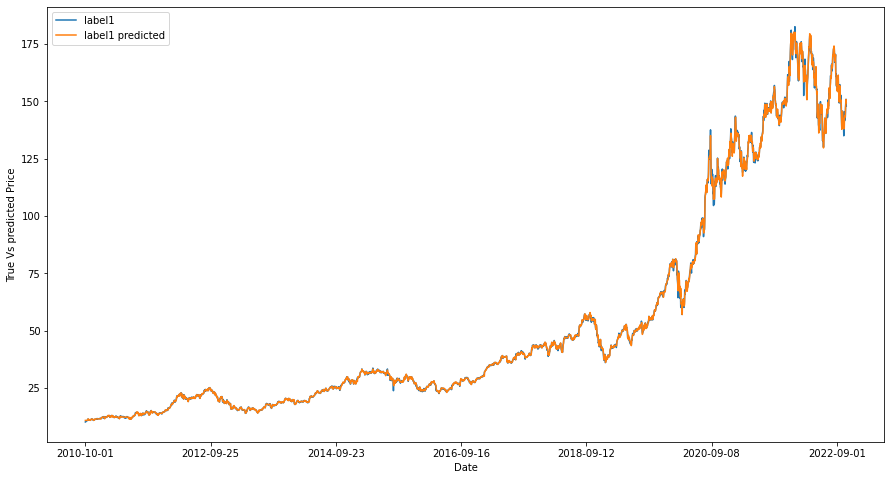

Accuracy check for High price prediction
Mean Absolute Error: 0.219
Mean Squared Error: 0.1796
Root Mean Squared Error: 0.4238
(R^2) Score: 0.9999
Train Score : 99.99% and Test Score : 99.99% using Random Forest Regressor.
Accuracy: 99.6 %.
                label2  label2 predicted
Date                                    
2010-10-01   10.103571         10.393072
2010-10-04     10.3375         10.374458
2010-10-05   10.428214         10.426039
2010-10-06   10.374286         10.429873
2010-10-07   10.517857         10.488205
...                ...               ...
2022-10-20  147.850006        146.770815
2022-10-21  150.229996        149.388029
2022-10-24  152.490005        152.002716
2022-10-25  151.990005        151.897933
2022-10-26  149.050003        151.157832

[3039 rows x 2 columns]


Graph for High price (Actual vs Predicted)


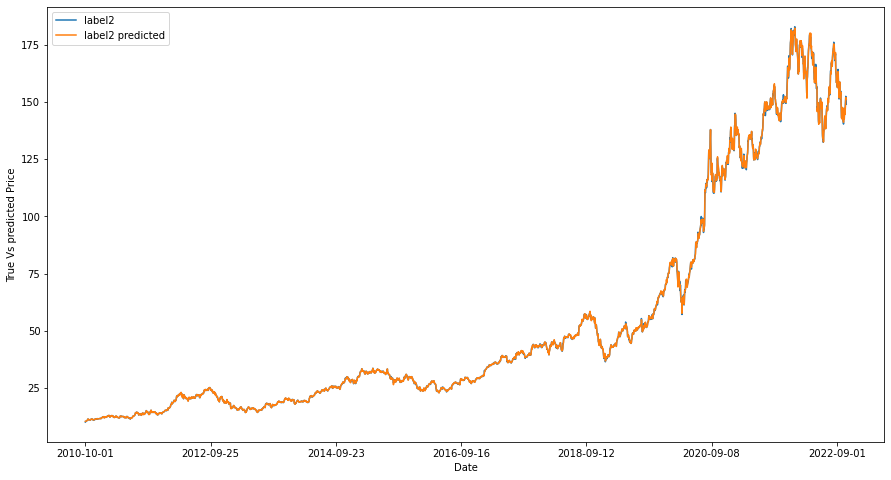

Accuracy check for Low price prediction
Mean Absolute Error: 0.2096
Mean Squared Error: 0.2299
Root Mean Squared Error: 0.4795
(R^2) Score: 0.9999
Train Score : 99.99% and Test Score : 99.99% using Random Forest Regressor.
Accuracy: 99.63 %.
                label3  label3 predicted
Date                                    
2010-10-01    9.920357         10.159387
2010-10-04      10.065         10.126307
2010-10-05   10.187857         10.215858
2010-10-06   10.246786         10.274367
2010-10-07   10.357143         10.325959
...                ...               ...
2022-10-20  142.649994        142.483039
2022-10-21       146.0        146.217567
2022-10-24  149.360001        149.151700
2022-10-25  148.039993        148.515756
2022-10-26  144.130005        146.843615

[3039 rows x 2 columns]


Graph for Low price (Actual vs Predicted)


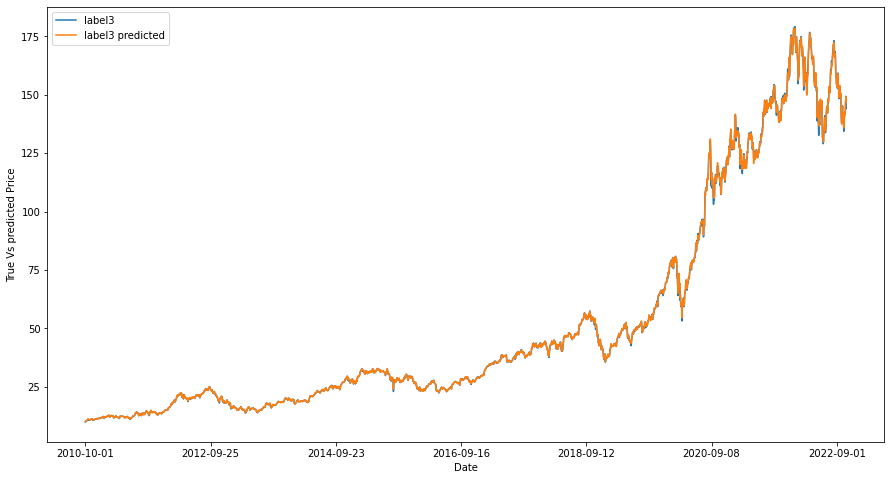

Accuracy check for Close price prediction
Mean Absolute Error: 0.2203
Mean Squared Error: 0.2115
Root Mean Squared Error: 0.4599
(R^2) Score: 0.9999
Train Score : 99.99% and Test Score : 99.99% using Random Forest Regressor.
Accuracy: 99.61 %.
                label4  label4 predicted
Date                                    
2010-10-01    9.951429         10.339256
2010-10-04   10.319286         10.330589
2010-10-05   10.328214         10.334333
2010-10-06   10.329286         10.366126
2010-10-07     10.5025         10.464470
...                ...               ...
2022-10-20  147.270004        146.480903
2022-10-21  149.449997        149.260338
2022-10-24  152.339996        151.793459
2022-10-25  149.350006        150.133722
2022-10-26  144.800003        148.729585

[3039 rows x 2 columns]


Graph for Close price (Actual vs Predicted)


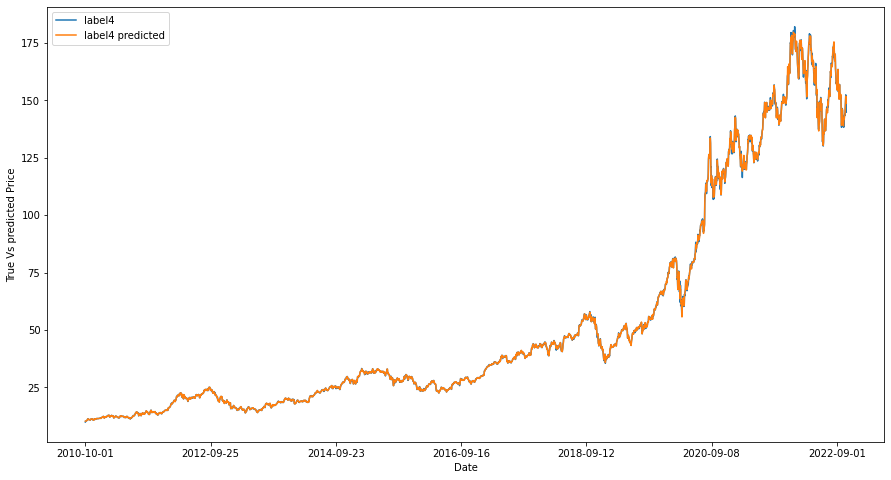

Accuracy check for Adj Close price prediction
Mean Absolute Error: 0.109
Mean Squared Error: 0.0386
Root Mean Squared Error: 0.1966
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Forest Regressor.
Accuracy: 99.73 %.
                label5  label5 predicted
Date                                    
2010-10-01    8.482778          8.810936
2010-10-04    8.796343          8.808536
2010-10-05    8.803954          8.818807
2010-10-06    8.804866          8.836642
2010-10-07    8.952519          8.923669
...                ...               ...
2022-10-20  147.026108        146.822823
2022-10-21  149.202484        149.023773
2022-10-24  152.087708        151.680958
2022-10-25  149.102661        148.909223
2022-10-26  144.560196        143.900601

[3039 rows x 2 columns]


Graph for Adj Close price (Actual vs Predicted)


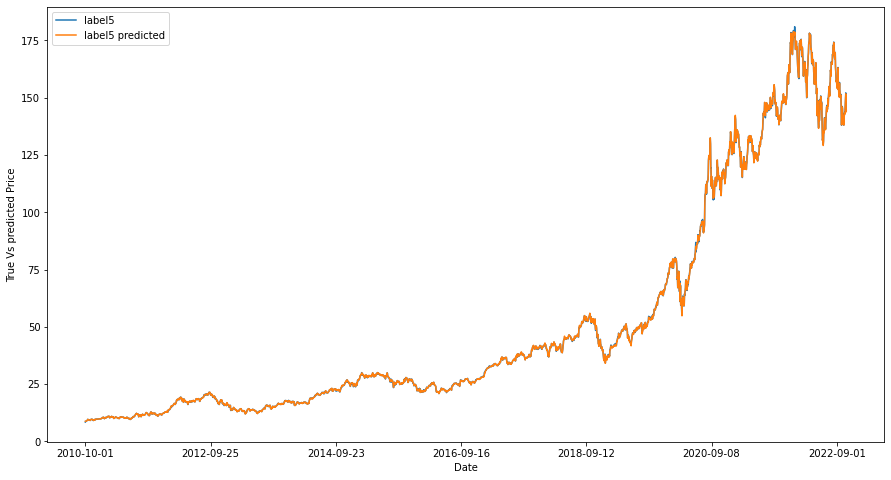

In [205]:
import matplotlib.pyplot as plt
analysis={}

for i in [0,1,2,3,4]:
  predict = model[i].predict(df1.iloc[:,0:5+i])
  print("Accuracy check for "+features[i]+" price prediction")
  print("Mean Absolute Error:", round(metrics.mean_absolute_error(df1.iloc[:,5+i], predict), 4))
  print("Mean Squared Error:", round(metrics.mean_squared_error(df1.iloc[:,5+i], predict), 4))
  print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(df1.iloc[:,5+i], predict)), 4))
  print("(R^2) Score:", round(metrics.r2_score(df1.iloc[:,5+i], predict), 4))
  print(f'Train Score : {model[i].score(df1.iloc[:,0:5+i], df1.iloc[:,5+i]) * 100:.2f}% and Test Score : {model[i].score(df1.iloc[:,0:5+i],df1.iloc[:,5+i]) * 100:.2f}% using Random Forest Regressor.')
  errors = abs(predict - df1.iloc[:,5+i])
  mape = 100 * (errors / df1.iloc[:,5+i])
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')
  analysis[i]=pd.DataFrame(df1[labels[i]])
  analysis[i][labels[i]+" predicted"]=predict
  print(analysis[i])
  print("\n")
  print("Graph for "+features[i]+ " price (Actual vs Predicted)")
  read_df = analysis[i]
  read_df.plot(figsize = (15,8))
  plt.ylabel("True Vs predicted Price")
  
  plt.show()

  


Acurracy for each prediction is approximately 99％ for all instances.

Forcasting values for 5 days from 2022/10/27 to 2022/10/31.

In [206]:
#2022/10/26 data is fed to forcast consecutive five days data.
df2=df1.iloc[-1:,0:5]
df3=df2.iloc[-1:,0:5]

features=[ "Open","High","Low","Close","Adj Close"]
labels=["label1","label2","label3","label4","label5"]

Days=5
predicts={}

for j in range(Days):
  
  for i in [0,1,2,3,4]:
    predicts[i]=model[i].predict(df2.iloc[-1:,0:5+i])
    df2[labels[i]]=predicts[i]

  df3 = df3.append({'Open': predicts[0], 'High': predicts[1], 'Low': predicts[2], 'Close':predicts[3],'Adj Close':predicts[4]}, ignore_index = True)
  df2=df3.iloc[-1:,0:5]

print("No of Forecasting days = ",Days)
df3

No of Forecasting days =  5


,Open,High,Low,Close,Adj Close
0,150.960007,151.990005,148.039993,149.350006,149.102661
1,[149.50620904644472],[151.73075400930213],[148.92886630249023],[150.45858718811522],[149.84142707824708]
2,[149.9752097711319],[151.29573388661123],[148.42614389038087],[150.66331057182194],[150.22955456542968]
3,[149.6422564919738],[152.68275099421624],[149.03205554199218],[151.22753647613524],[150.5469079284668]
4,[150.23574447635102],[152.0729272206688],[149.10693948364258],[150.89398175549746],[150.27169497680663]
5,[150.10772661552906],[151.85327936885537],[149.2048598022461],[150.65760733387825],[150.11950453186034]
